# Artificial Neural Network

## Part 1 - Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

### Importing the dataset

In [3]:
#Access input folder
current_dir = Path.cwd()
input_dir1 = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_6")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2=  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()] # folder1 - RP_curves_fr7m
print ("2",input_dir2)

input G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6
2 [WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_6/RP_curves_fr25m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_6/RP_curves_fr27m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_6/RP_curves_fr29m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_6/RP_curves_fr30m')]


In [4]:
#dataset = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list = []

for folder1 in input_dir2:
    
    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()] # folder2 - 07m00.5kg
    
    for folder2 in input_dir3:
        
        print ('folder', folder2)
        files1 = [file1 for file1 in folder2.rglob("*.xlsx")]
    
        for file1 in files1:
            df_list.append(pd.read_excel(file1))
            print (file1.stem)
    
dataset = pd.concat(df_list, ignore_index = True)

folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m00.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m02.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m04.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m06.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m08.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m10.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m12.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m14.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m16.5kg
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m18.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_6\RP_curves_fr25m\25m20.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Se

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433422 entries, 0 to 433421
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Mass               433422 non-null  float64
 1   Standoff distance  433422 non-null  int64  
 2   Angle              433422 non-null  int64  
 3   Time               433422 non-null  float64
 4   Phase              433422 non-null  object 
 5   Pressure           433422 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 19.8+ MB


In [6]:
dataset = pd.get_dummies(dataset, columns =['Phase'], dtype = np.uint8)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433422 entries, 0 to 433421
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Mass                       433422 non-null  float64
 1   Standoff distance          433422 non-null  int64  
 2   Angle                      433422 non-null  int64  
 3   Time                       433422 non-null  float64
 4   Pressure                   433422 non-null  float64
 5   Phase_negative_decreasing  433422 non-null  uint8  
 6   Phase_negative_increasing  433422 non-null  uint8  
 7   Phase_positive             433422 non-null  uint8  
dtypes: float64(3), int64(2), uint8(3)
memory usage: 17.8 MB


In [7]:
dataset.head(30)

,Mass,Standoff distance,Angle,Time,Pressure,Phase_negative_decreasing,Phase_negative_increasing,Phase_positive
0,0.5,25,0,67.794907,4.165875,0,0,1
1,0.5,25,0,67.831663,4.117344,0,0,1
2,0.5,25,0,67.868441,3.996742,0,0,1
3,0.5,25,0,67.905219,3.823539,0,0,1
4,0.5,25,0,67.941997,3.611555,0,0,1
5,0.5,25,0,67.978793,3.364867,0,0,1
6,0.5,25,0,68.015603,3.092086,0,0,1
7,0.5,25,0,68.052414,2.779633,0,0,1
8,0.5,25,0,68.089230,2.444719,0,0,1
9,0.5,25,0,68.125987,2.096375,0,0,1


In [8]:
y = dataset['Pressure']
X = dataset.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(433422, 7) (433422,)


In [9]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

[[ 1.25632029 -0.39665052 -0.51071547 ...  1.          0.
   0.        ]
 [-0.00908179 -0.39665052 -1.4116624  ...  1.          0.
   0.        ]
 [-0.41401045  1.16750252 -0.51071547 ...  1.          0.
   0.        ]
 ...
 [-0.00908179 -0.39665052 -0.51071547 ...  0.          0.
   1.        ]
 [-1.62879645 -0.39665052 -0.51071547 ...  0.          0.
   1.        ]
 [ 1.00323987  0.64611817  0.39023145 ...  0.          1.
   0.        ]]


In [13]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[-1.22386778  1.16750252  0.39023145 ...  1.          0.
   0.        ]
 [ 1.25632029  0.64611817 -1.4116624  ...  1.          0.
   0.        ]
 [ 1.2057042  -0.39665052  1.29117838 ...  0.          0.
   1.        ]
 ...
 [ 1.2057042   0.64611817 -1.4116624  ...  0.          1.
   0.        ]
 [-2.03372511 -0.39665052  1.29117838 ...  0.          0.
   1.        ]
 [-0.21154612 -0.39665052  1.29117838 ...  0.          1.
   0.        ]]


In [14]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[ 0.59831121 -0.39665052  1.29117838 ...  0.          1.
   0.        ]
 [-0.41401045 -0.39665052  0.39023145 ...  1.          0.
   0.        ]
 [-0.41401045 -0.39665052 -0.51071547 ...  1.          0.
   0.        ]
 ...
 [ 1.00323987  1.16750252  1.29117838 ...  0.          0.
   1.        ]
 [ 0.80077554 -1.43941921 -0.51071547 ...  1.          0.
   0.        ]
 [ 1.00323987 -1.43941921 -0.51071547 ...  1.          0.
   0.        ]]


In [15]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 260053
X_test 86685
X_val 86684


## Part 3 - Building the ANN

### Initializing the ANN

In [16]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=150,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))

### Adding the second hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=125,
                              activation='relu'))

### Adding the third hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=100,
                              activation='relu'))

### Adding the fourth hidden layer

In [20]:
ann.add(tf.keras.layers.Dense(units=75,
                              activation='relu'))

### Adding the output layer

In [21]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [22]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1200      
                                                                 
 dense_1 (Dense)             (None, 125)               18875     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 75)                7575      
                                                                 
 dense_4 (Dense)             (None, 1)                 76        
                                                                 
Total params: 40,326
Trainable params: 40,326
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [23]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [24]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [25]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=40,
                    verbose=1)

Epoch 1/500
6502/6502 [==============================] - 26s 4ms/step - loss: 1.7621 - mae: 0.5584 - val_loss: 1.8348 - val_mae: 0.5132
Epoch 2/500
6502/6502 [==============================] - 26s 4ms/step - loss: 1.2541 - mae: 0.4412 - val_loss: 0.6640 - val_mae: 0.3332
Epoch 3/500
6502/6502 [==============================] - 26s 4ms/step - loss: 0.9552 - mae: 0.3458 - val_loss: 1.2381 - val_mae: 0.5681
Epoch 4/500
6502/6502 [==============================] - 27s 4ms/step - loss: 0.8604 - mae: 0.3190 - val_loss: 1.6735 - val_mae: 0.4522
Epoch 5/500
6502/6502 [==============================] - 27s 4ms/step - loss: 1.2571 - mae: 0.3888 - val_loss: 0.6657 - val_mae: 0.2342
Epoch 6/500
6502/6502 [==============================] - 27s 4ms/step - loss: 0.8016 - mae: 0.2805 - val_loss: 1.0198 - val_mae: 0.3263
Epoch 7/500
6502/6502 [==============================] - 27s 4ms/step - loss: 0.7704 - mae: 0.2648 - val_loss: 0.5970 - val_mae: 0.1941
Epoch 8/500
6502/6502 [=========================

### Analyse learn history

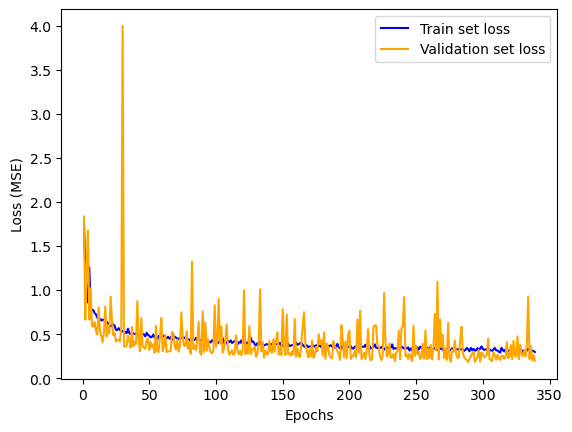

In [26]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

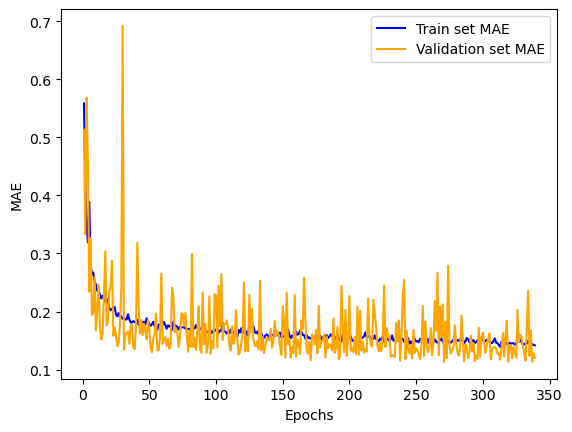

In [27]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
print (epochs)

### Save the model

In [ ]:
ann.save('Section3_ANN_1')
import pickle
pickle.dump(sc, open('Section3_scaler_ANN_1.pkl', 'wb'))

## Part 5 - Make predictions

In [ ]:
ann = load_model('ANN_13.h5')
sc = pickle.load(open('scaler_ANN.pkl', 'rb'))

2709/2709 [==============================] - 8s 3ms/step


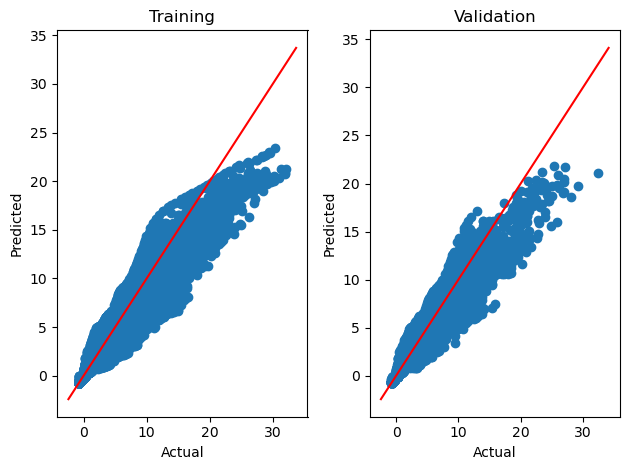

In [28]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
y_pred = ann.predict(X_test)
y_pred_e = y_pred/1000
y_test_e = y_test/1000
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_e.reshape(len(y_pred_e),1), y_test_e.reshape(len(y_test_e),1)),1))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,1200000],[0,1200000], color = "red")
#plt.axis ([0,1200000,0,1200000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

In [ ]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = 60
u_l = 300

# Add scatterplot
ax1.scatter(y_test_e, y_pred_e, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 21)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


In [ ]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

In [ ]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

In [ ]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

In [ ]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test_e, y_pred_e))

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test_e, y_pred_e)